## Final Project Submission

Please fill out:
* Student name: Christopher Miley 
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL: https://www.blogger.com/blog/post/edit/1224276646261516200/1789492233906042393


In [1]:
#import dataset libraries

import sqlite3
import pandas as pd

In [2]:
#load budget dataset

budget_df = pd.read_csv('movie_information_files/tn.movie_budgets.csv', index_col=0)

In [3]:
#inspect dataset

budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#inspect value types

budget_df.dtypes

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [5]:
#inspect size

budget_df.shape

(5782, 5)

In [6]:
#inspect for missing values

budget_df.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [7]:
#check for duplicate records

duplicates = budget_df.duplicated()
for row in duplicates:
    if not True:
        print(row)

In [8]:
#add a column to the dataset called 'total_profit'

budget_df['total_profit'] = budget_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int) - budget_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)

In [9]:
#change the format of 'total_profit' to reflect currency

budget_df['total_profit'] = budget_df['total_profit'].apply(lambda x: '${:,.0f}'.format(x))

In [10]:
#inspect edited dataset

budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","$2,351,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","$635,063,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","$-200,237,650"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","$1,072,413,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","$999,721,747"


In [11]:
#import libraries for graphing

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [12]:
#make a copy of the dataset for visualization analysis

budget_graph_df = budget_df.copy()

In [13]:
#convert financial columns to numeric values

for column in ['production_budget', 'domestic_gross', 'worldwide_gross', 'total_profit']:
    budget_graph_df[column] = budget_graph_df[column].str.replace('$', '').str.replace(',', '').astype(int)

In [14]:
#convert 'release_date' column to datetime values

budget_graph_df['release_date'] = pd.to_datetime(budget_graph_df['release_date'])

#add another column that just reflects the release year called 'release_year' as a numeric value

budget_graph_df['release_year'] = budget_graph_df['release_date'].dt.year.astype(int)

In [15]:
#import library for adjusting format of graphing ticks

import matplotlib.ticker as ticker

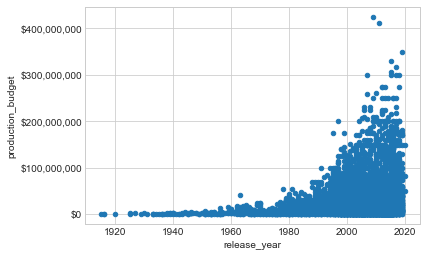

In [16]:
# Create a scatter plot to look for a linear relationship between release_year and production_budget
ax = budget_graph_df.plot.scatter(x='release_year', y='production_budget')

# Customize the y-axis tick labels
currency_formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(currency_formatter)

# Display the plot
plt.show()

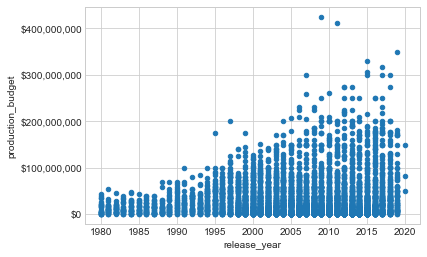

In [17]:
#filter to release years from 1980 to present day to inspect for a linear relationship to production_budget
year_filtered_budget_df = budget_graph_df[(budget_graph_df['release_year'] >= 1980)]

# Create a scatter plot to look for a linear relationship between release_year and production_budget
ax = year_filtered_budget_df.plot.scatter(x='release_year', y='production_budget')

# Customize the y-axis tick labels
currency_formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(currency_formatter)

# Display the plot
plt.show()

In [18]:
#calculate the correlation coefficient 
year_budget_correlation_coefficient = year_filtered_budget_df['release_year'].corr(year_filtered_budget_df['production_budget'])
print(year_budget_correlation_coefficient)

0.11741441973710044


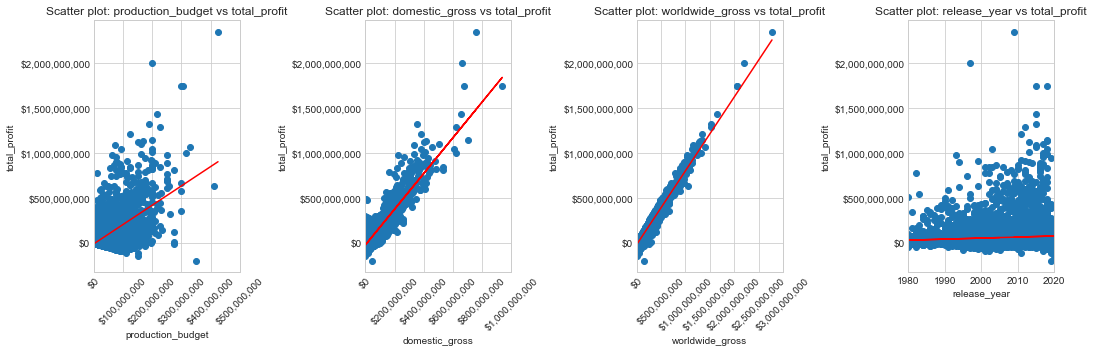

In [19]:
#use 'total_profit' as the target variable to run other variables against
target_variable = "total_profit"
numeric_columns = year_filtered_budget_df.select_dtypes(include='number').columns

# Exclude the target variable
numeric_columns = [col for col in numeric_columns if col != target_variable] 

#set up the plot
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

#iterate through each variable to plot against 'total_profit'
for index, column in enumerate(numeric_columns):
    if column != target_variable:
        ax = axes[index]
        ax.scatter(year_filtered_budget_df[column], year_filtered_budget_df[target_variable])
        if column != 'release_year':      #adjust the x ticks for currency graphs
            ax.xaxis.set_major_formatter(currency_formatter)
            ax.set_xlim(0)  # Set the lower limit of x-axis to zero
            ax.set_xticks(ax.get_xticks())
            ax.set_xticklabels([f'${x:,.0f}' for x in ax.get_xticks()], rotation=45)
        else:
            ax.set_xlim(1980, 2020)  #adjust the x ticks for release_year graph for better visual
        ax.yaxis.set_major_formatter(currency_formatter)  #adjust the y ticks to currency
        
        #set the labels and title
        ax.set_xlabel(column)
        ax.set_ylabel(target_variable)
        ax.set_title(f"Scatter plot: {column} vs {target_variable}")
        
        # Calculate linear regression line
        x = year_filtered_budget_df[column]
        y = year_filtered_budget_df[target_variable]
        slope, intercept = np.polyfit(x, y, deg=1)
        regression_line = slope * x + intercept

        # Plot linear regression line
        ax.plot(x, regression_line, color='red')

#adjust layout and show graphs
plt.tight_layout()
plt.show()

In [20]:
#set up a correlation matrix
correlation_matrix = year_filtered_budget_df.select_dtypes(include='number').corr()

#print out the correlation coefficients for each variable
print(correlation_matrix[target_variable])

production_budget    0.614824
domestic_gross       0.926814
worldwide_gross      0.982121
total_profit         1.000000
release_year         0.066601
Name: total_profit, dtype: float64


In [21]:
#import statsmodels library for model testing
import statsmodels.api as sm

In [22]:
#set the variables for the model
X = year_filtered_budget_df[["worldwide_gross"]]
y = year_filtered_budget_df["total_profit"]

In [23]:
#set the model
model = sm.OLS(endog=y, exog=sm.add_constant(X))

#set and print the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.499e+05
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:49:34   Log-Likelihood:            -1.0231e+05
No. Observations:                5511   AIC:                         2.046e+05
Df Residuals:                    5509   BIC:                         2.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.601e+07   4.26e+05    -

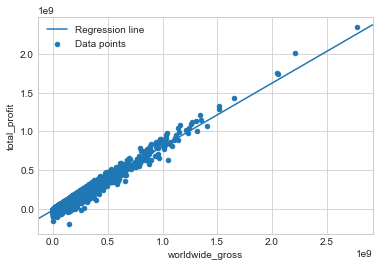

In [24]:
#plot the data alongisde a regression line
fig, ax = plt.subplots()
year_filtered_budget_df.plot.scatter(x="worldwide_gross", y="total_profit", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

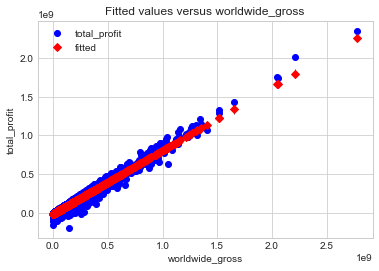

In [25]:
#plot a fitted graph
sm.graphics.plot_fit(results, "worldwide_gross")
plt.show()

In [26]:
#look at the confidence interval
print(results.conf_int())

                            0             1
const           -1.684328e+07 -1.517490e+07
worldwide_gross  8.162781e-01  8.245852e-01


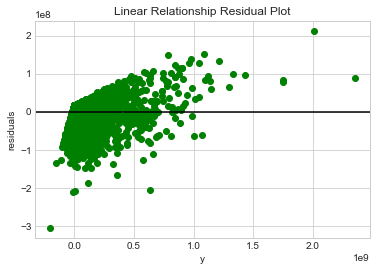

In [27]:
#plot a graph of the residuals
linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

In [28]:
#import linear test to check for non-linearity
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(linear_results)

(15.573281021250821, 0.0)

In [29]:
#sort values by highest profit
budget_graph_df.sort_values('total_profit', inplace=True, ascending=False)

In [30]:
#check the edited dataframe
budget_graph_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,2009
43,1997-12-19,Titanic,200000000,659363944,2208208395,2008208395,1997
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,2015


In [31]:
#pull the 20 highest profitable movies
top_twenty_profit_df = budget_graph_df.head(20)

In [32]:
#check the new dataframe
top_twenty_profit_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,2009
43,1997-12-19,Titanic,200000000,659363944,2208208395,2008208395,1997
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,2015
67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,2015
27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,2012
61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011
42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,2018


In [33]:
#import for formatting graph ticks
import matplotlib.ticker as ticker

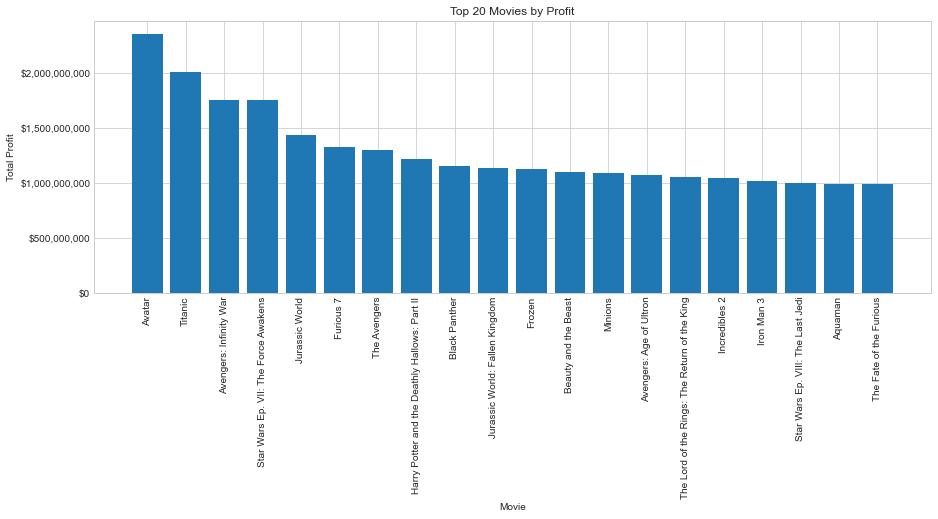

In [34]:
#plot bar graph of twenty most profitable movies
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(top_twenty_profit_df['movie'], top_twenty_profit_df['total_profit'])

# Add labels and title
ax.set_xlabel('Movie')
ax.set_ylabel('Total Profit')
ax.set_title('Top 20 Movies by Profit')

# Format y-axis ticks with "$" symbol
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the graph
plt.show()

In [35]:
#load movie database
db_file = 'movie_information_files/im.db'
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

In [36]:
#inspect the persons table
pd.read_sql("""
            SELECT *
            FROM persons
            WHERE primary_name = 'Meryl Streep'
            LIMIT 5;
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0000658,Meryl Streep,1949.0,None,"actress,soundtrack,producer"


In [37]:
#inspect the movie_basics table
pd.read_sql("""
            SELECT *
            FROM movie_basics
            LIMIT 5;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [38]:
#inspect the principals table
pd.read_sql("""
            SELECT *
            FROM principals
            JOIN persons
                USING(person_id)
            WHERE primary_name = 'Anthony Russo'
            LIMIT 15;
""", conn)

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession
0,tt1843866,5,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
1,tt3498820,5,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
2,tt4154756,5,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
3,tt4154796,5,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
4,tt8688634,9,nm0751577,producer,producer,None,Anthony Russo,1970.0,None,"producer,director,writer"
5,tt8936646,9,nm0751577,producer,producer,None,Anthony Russo,1970.0,None,"producer,director,writer"
6,tt9130508,2,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
7,tt9252468,7,nm0751577,producer,producer,None,Anthony Russo,1970.0,None,"producer,director,writer"
8,tt5557700,2,nm8003276,self,None,"[""Himself""]",Anthony Russo,NaN,None,producer


In [39]:
#create a dataframe extracting movies, their genre, director, and principal actors
query = '''
SELECT m.primary_title AS movie_name, m.genres, m.start_year AS year, p.primary_name AS person_name,
    CASE
        WHEN pr.category = 'actor' OR pr.category = 'actress' THEN 'Principal Actor'
        WHEN pr.category = 'director' THEN 'Director'
    END AS role
FROM movie_basics AS m
LEFT JOIN principals AS pr ON m.movie_id = pr.movie_id AND pr.person_id = pr.person_id
LEFT JOIN persons AS p ON pr.person_id = p.person_id;
'''
filtered_movie_df = pd.read_sql_query(query, conn)

In [40]:
#drop duplicate rows
filtered_movie_df.drop_duplicates(inplace=True)

In [41]:
#clean dataframe removing punctuation
filtered_movie_df['person_name'] = filtered_movie_df['person_name'].str.replace("""'""", '')

In [42]:
#drop missing values
filtered_movie_df = filtered_movie_df.dropna()

In [43]:
#keep only names that are in the alphabet or number system
filtered_movie_df = filtered_movie_df[filtered_movie_df['person_name'].str.match(r'^[a-zA-Z0-9]')]

In [44]:
#capitalize names
filtered_movie_df['person_name'] = filtered_movie_df['person_name'].str.title()

In [45]:
#sort names alphabetically
filtered_movie_df.sort_values('person_name', ascending=True, inplace=True)

In [46]:
#inspect edited dataframe
filtered_movie_df

,movie_name,genres,year,person_name,role
681505,King of the Ville,Drama,2011,10Gzy,Principal Actor
951134,Aatagallu,Thriller,2018,143 Anand,Principal Actor
45216,Beneath the Surface,Documentary,2015,1996 Olympic Water Polo Team,Principal Actor
45217,Beneath the Surface,Documentary,2015,2004 Olympic Water Polo Team,Principal Actor
45215,Beneath the Surface,Documentary,2015,2008 Olympic Water Polo Team,Principal Actor
...,...,...,...,...,...
661662,Ikizler firarda,"Comedy,Drama",2012,Zülfü Hamit Altin,Principal Actor
841995,Nefrin,Horror,2017,Zülfü Hamit Altin,Principal Actor
73128,Veda - Atatürk,"Biography,Drama,History",2010,Zülfü Livaneli,Director
263175,300 Worte Deutsch,"Comedy,Drama",2013,Züli Aladag,Director


In [47]:
#inspect size of the dataframe
filtered_movie_df.shape

(532871, 5)

In [48]:
#check example rows
filtered_movie_df[filtered_movie_df["person_name"] == "Scarlett Johansson"]

,movie_name,genres,year,person_name,role
3303,The Avengers,"Action,Adventure,Sci-Fi",2012,Scarlett Johansson,Principal Actor
36786,Ghost in the Shell,"Action,Drama,Sci-Fi",2017,Scarlett Johansson,Principal Actor
136531,Her,"Drama,Romance,Sci-Fi",2013,Scarlett Johansson,Principal Actor
247603,Don Jon,"Comedy,Drama,Romance",2013,Scarlett Johansson,Principal Actor
658694,American Express Unstaged: Ellie Goulding,Music,2015,Scarlett Johansson,Director
52601,Under the Skin,"Drama,Horror,Sci-Fi",2013,Scarlett Johansson,Principal Actor
452680,Captain America: Civil War,"Action,Adventure,Sci-Fi",2016,Scarlett Johansson,Principal Actor
48197,We Bought a Zoo,"Comedy,Drama,Family",2011,Scarlett Johansson,Principal Actor
800753,Sing 2,"Animation,Comedy,Family",2021,Scarlett Johansson,Principal Actor
4832,Hitchcock,"Biography,Comedy,Drama",2012,Scarlett Johansson,Principal Actor


In [49]:
#reset the index
filtered_movie_df.reset_index(drop=True, inplace=True)
filtered_movie_df

,movie_name,genres,year,person_name,role
0,King of the Ville,Drama,2011,10Gzy,Principal Actor
1,Aatagallu,Thriller,2018,143 Anand,Principal Actor
2,Beneath the Surface,Documentary,2015,1996 Olympic Water Polo Team,Principal Actor
3,Beneath the Surface,Documentary,2015,2004 Olympic Water Polo Team,Principal Actor
4,Beneath the Surface,Documentary,2015,2008 Olympic Water Polo Team,Principal Actor
...,...,...,...,...,...
532866,Ikizler firarda,"Comedy,Drama",2012,Zülfü Hamit Altin,Principal Actor
532867,Nefrin,Horror,2017,Zülfü Hamit Altin,Principal Actor
532868,Veda - Atatürk,"Biography,Drama,History",2010,Zülfü Livaneli,Director
532869,300 Worte Deutsch,"Comedy,Drama",2013,Züli Aladag,Director


In [50]:
#check another example
filtered_movie_df[(filtered_movie_df["person_name"] == "Martin Scorsese")]

,movie_name,genres,year,person_name,role
322810,The Wolf of Wall Street,"Biography,Crime,Drama",2013,Martin Scorsese,Director
322811,Rolling Thunder Revue: A Bob Dylan Story by Ma...,Documentary,2019,Martin Scorsese,Director
322812,George Harrison: Living in the Material World,"Biography,Documentary,Music",2011,Martin Scorsese,Director
322813,Public Speaking,Documentary,2010,Martin Scorsese,Director
322814,Hugo,"Adventure,Drama,Family",2011,Martin Scorsese,Director
322815,Shutter Island,"Mystery,Thriller",2010,Martin Scorsese,Director
322816,The Irishman,"Biography,Crime,Drama",2019,Martin Scorsese,Director
322817,The 50 Year Argument,Documentary,2014,Martin Scorsese,Director
322818,Silence,"Adventure,Drama,History",2016,Martin Scorsese,Director


In [51]:
#take the 100 most profitable movies
hundred_profit_df = budget_graph_df.head(100)

In [52]:
#merge the cast/director/genre dataframe with the 100 most profitable movies dataframe
merged_actor_profit_df = hundred_profit_df.merge(filtered_movie_df, left_on=['movie', 'release_year'], right_on=['movie_name', 'year'])

In [53]:
#inspect new dataframe
merged_actor_profit_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,movie_name,genres,year,person_name,role
0,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Anthony Russo,Director
1,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Chris Evans,Principal Actor
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Chris Hemsworth,Principal Actor
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Joe Russo,Director
4,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Mark Ruffalo,Principal Actor
...,...,...,...,...,...,...,...,...,...,...,...,...
297,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,Shrek Forever After,"Adventure,Animation,Comedy",2010,Antonio Banderas,Principal Actor
298,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,Shrek Forever After,"Adventure,Animation,Comedy",2010,Cameron Diaz,Principal Actor
299,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,Shrek Forever After,"Adventure,Animation,Comedy",2010,Eddie Murphy,Principal Actor
300,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,Shrek Forever After,"Adventure,Animation,Comedy",2010,Mike Mitchell,Director


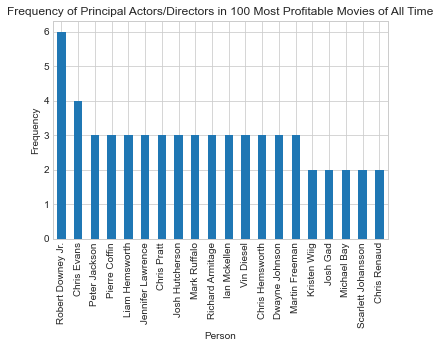

In [54]:
# Get the frequency of each primary_name
name_counts = merged_actor_profit_df['person_name'].value_counts()

# Create the bar plot
name_counts.head(20).plot(kind='bar')

# Add labels and title
plt.xlabel('Person')
plt.ylabel('Frequency')
plt.title('Frequency of Principal Actors/Directors in 100 Most Profitable Movies of All Time')

# Display the graph
plt.show()

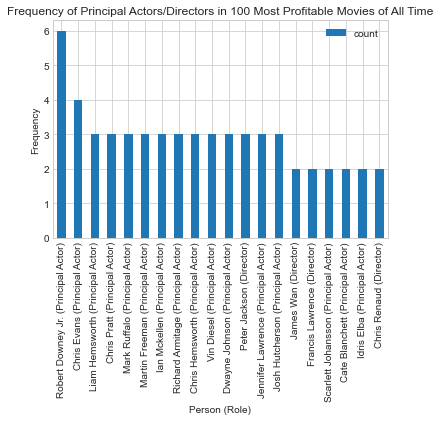

In [55]:
# Get the frequency of each primary_name and role
name_role_counts = merged_actor_profit_df.groupby(['person_name', 'role']).size().reset_index(name='count')

# Create a new column with names and roles
name_role_counts['name_with_role'] = name_role_counts['person_name'] + ' (' + name_role_counts['role'] + ')'

# Sort the dataframe by count in descending order
name_role_counts = name_role_counts.sort_values(by='count', ascending=False)

# Create the bar plot
name_role_counts.head(20).plot(x='name_with_role', y='count', kind='bar')

# Add labels and title
plt.xlabel('Person (Role)')
plt.ylabel('Frequency')
plt.title('Frequency of Principal Actors/Directors in 100 Most Profitable Movies of All Time')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.show()

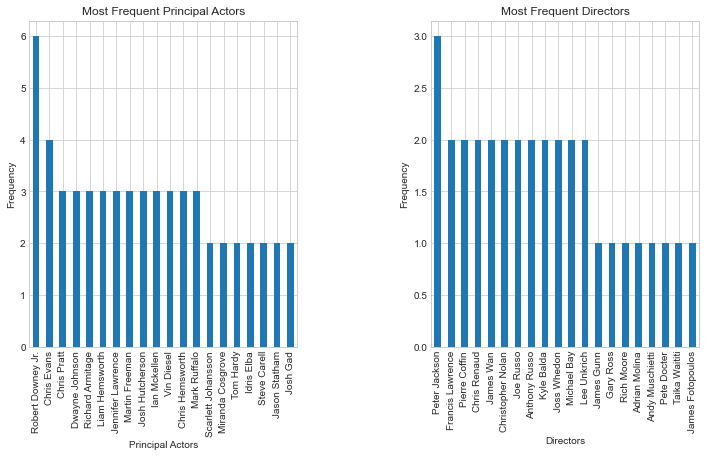

In [56]:
# Filter the dataframe for principal actors and directors
actors = merged_actor_profit_df[merged_actor_profit_df['role'].str.contains('actor', case=False)]
directors = merged_actor_profit_df[merged_actor_profit_df['role'].str.contains('director', case=False)]

# Get the top 20 frequency of each principal actor
actor_counts = actors['person_name'].value_counts().head(20)

# Get the top 20 frequency of each director
director_counts = directors['person_name'].value_counts().head(20)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the bar plot for principal actors
actor_counts.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Principal Actors')
ax1.set_ylabel('Frequency')
ax1.set_title('Most Frequent Principal Actors')

# Create the bar plot for directors
director_counts.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Directors')
ax2.set_ylabel('Frequency')
ax2.set_title('Most Frequent Directors')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the figure
plt.show()

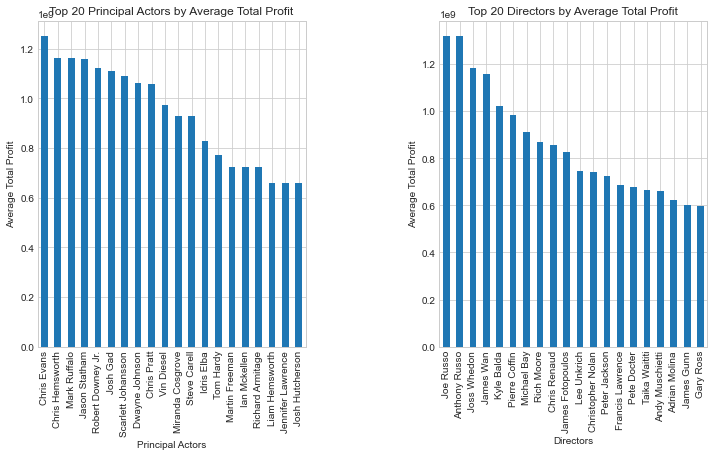

In [57]:
# Get the top 20 most frequent principal actors
top_20_actors = actor_counts.nlargest(20).index

# Get the top 20 most frequent directors
top_20_directors = director_counts.nlargest(20).index

# Filter the merged_actor_profit_df based on the top 20 actors and directors
filtered_actor_profit_df = merged_actor_profit_df[merged_actor_profit_df['person_name'].isin(top_20_actors)]
filtered_director_profit_df = merged_actor_profit_df[merged_actor_profit_df['person_name'].isin(top_20_directors)]

# Group the filtered dataframes by primary_name and calculate the average total_profit
grouped_actor_df = filtered_actor_profit_df.groupby('person_name')['total_profit'].mean().sort_values(ascending=False)
grouped_director_df = filtered_director_profit_df.groupby('person_name')['total_profit'].mean().sort_values(ascending=False)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the bar plot for top principal actors
grouped_actor_df.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Principal Actors')
ax1.set_ylabel('Average Total Profit')
ax1.set_title('Top 20 Principal Actors by Average Total Profit')

# Create the bar plot for top directors
grouped_director_df.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Directors')
ax2.set_ylabel('Average Total Profit')
ax2.set_title('Top 20 Directors by Average Total Profit')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the figure
plt.show()

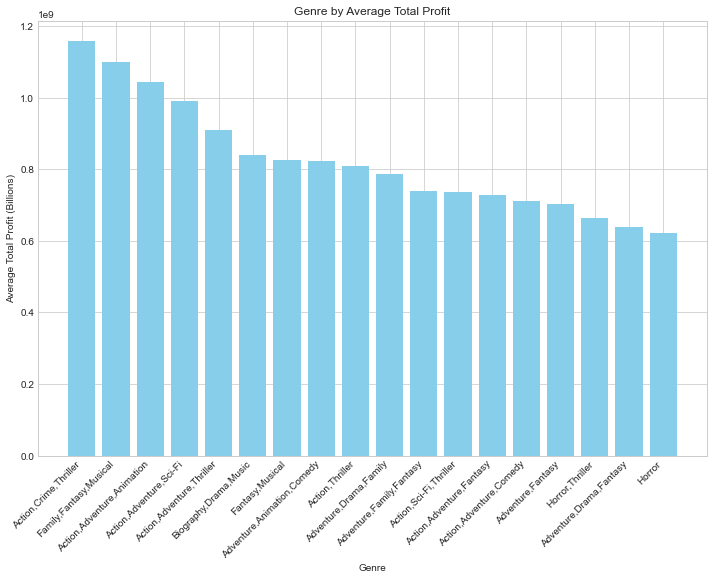

In [58]:
# Group the merged dataset by genre and calculate the average total profit for each genre
grouped_genre_df = merged_actor_profit_df.groupby('genres')['total_profit'].mean().reset_index()

# Sort the dataframe by average total profit in descending order
grouped_genre_df = grouped_genre_df.sort_values(by='total_profit', ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(grouped_genre_df['genres'], grouped_genre_df['total_profit'], color='skyblue')

# Customize the graph
plt.xlabel('Genre')
plt.ylabel('Average Total Profit (Billions)')
plt.title('Genre by Average Total Profit')
plt.xticks(rotation=45, ha='right')

# Show the graph
plt.show()

In [59]:
conn.close()